Accuracy: 0.6578947368421053
F1 score: 0.7936507936507936


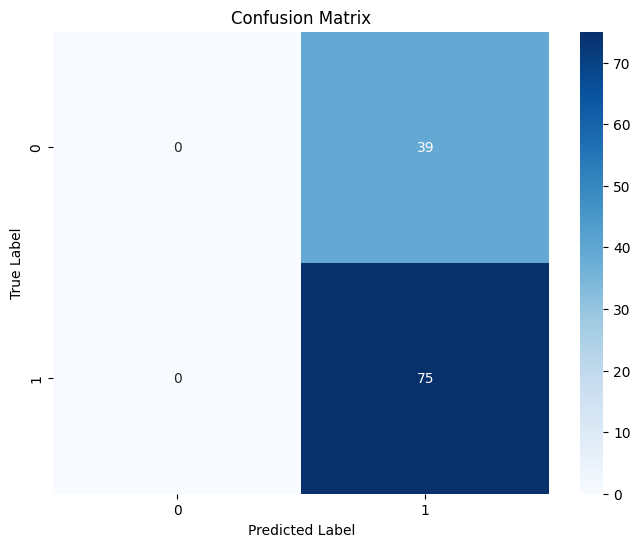

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Nicole\Desktop\Upwork\MachineLearning_Class\Breast_cancer_data.csv'
data = pd.read_csv(file_path)

# Separate independent variables (features) and target variable
X = data.drop('diagnosis', axis=1)  # features
y = data['diagnosis']               # target

# Transform features into binary (0 or 1)
binarizer = Binarizer()
X_binary = binarizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=10)

# Initialize the Multinomial Naive-Bayes classifier
mnb = MultinomialNB()

# Train the classifier with the training data
mnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mnb.predict(X_test)

# Evaluate the model accuracy by comparing the predictions with the actual values
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute the F1 score to evaluate the model's accuracy
f1_score_value = f1_score(y_test, y_pred)
print("F1 score:", f1_score_value)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the classes
classes = ['0', '1']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
